In [1]:

# import comet_ml at the top of your file
from comet_ml import Experiment
from pytorch_lightning.loggers import CometLogger

In [2]:
import torch
import pytorch_lightning as pl
torch.manual_seed(0) # Set for testing purposes, please do not change!

In [3]:
from nn_utils import GAN, Generator, Discriminator, MNISTDataModule

In [4]:
# Set your parameters
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001

In [5]:
gen = Generator(z_dim)
disc = Discriminator()
gan = GAN(generator=gen, discriminator=disc, learning_rate=lr)

In [6]:
data_module = MNISTDataModule(batch_size=batch_size)

In [7]:
experiment = CometLogger(
    api_key="F8z2rvZxchPyTT2l1IawCAE7G",
    project_name="gans-specialization",
    workspace="ihssen",
)

CometLogger will be initialized in online mode


In [8]:
trainer = pl.Trainer(max_epochs=n_epochs, logger=experiment)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


/home/hacene/.cache/pypoetry/virtualenvs/gans-BWrD77CZ-py3.8/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f'you defined a {step_name} but have no {loader_name}. Skipping {stage} loop')
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/ihssen/gans-specialization/2e418e90ac8a49b9bedb5a5fe04743ba

COMET WARNING: Empty mapping given to log_params({}); ignoring

  | Name      | Type              | Params
------------------------------------------------
0 | gen       | Generator         | 1.5 M 
1 | disc      | Discriminator     | 566 K 
2 | criterion | BCEWithLogitsLoss | 0     
------------------------------------------------
2.1 M     Trainable params
0        

/home/hacene/.cache/pypoetry/virtualenvs/gans-BWrD77CZ-py3.8/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:102: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 4:  25%|██▍       | 115/469 [00:05<00:17, 19.67it/s, loss=0.954, v_num=43ba, gen_loss=1.670, disc_loss=0.208]

/home/hacene/.cache/pypoetry/virtualenvs/gans-BWrD77CZ-py3.8/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:897: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn('Detected KeyboardInterrupt, attempting graceful shutdown...')


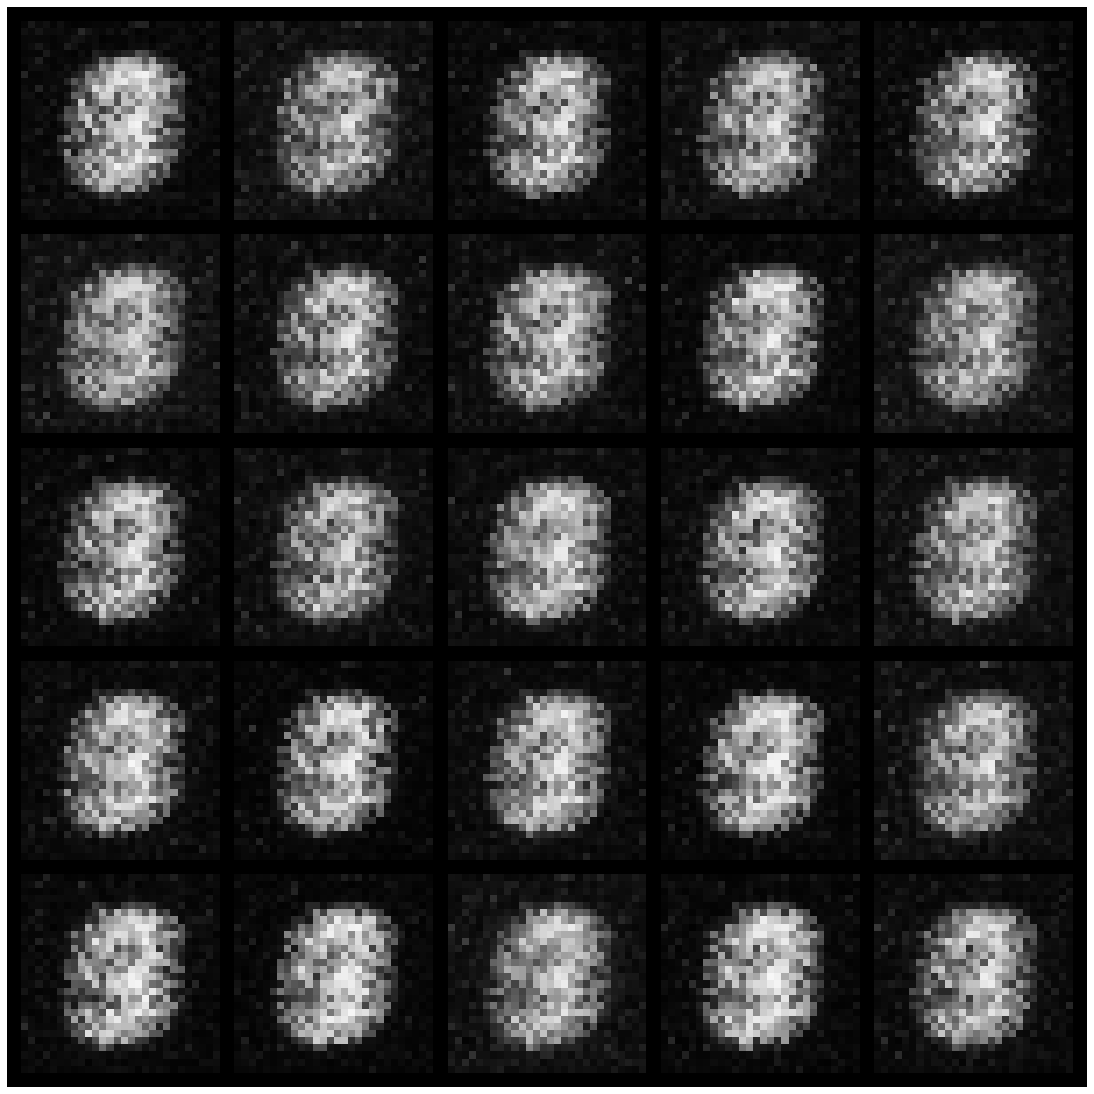

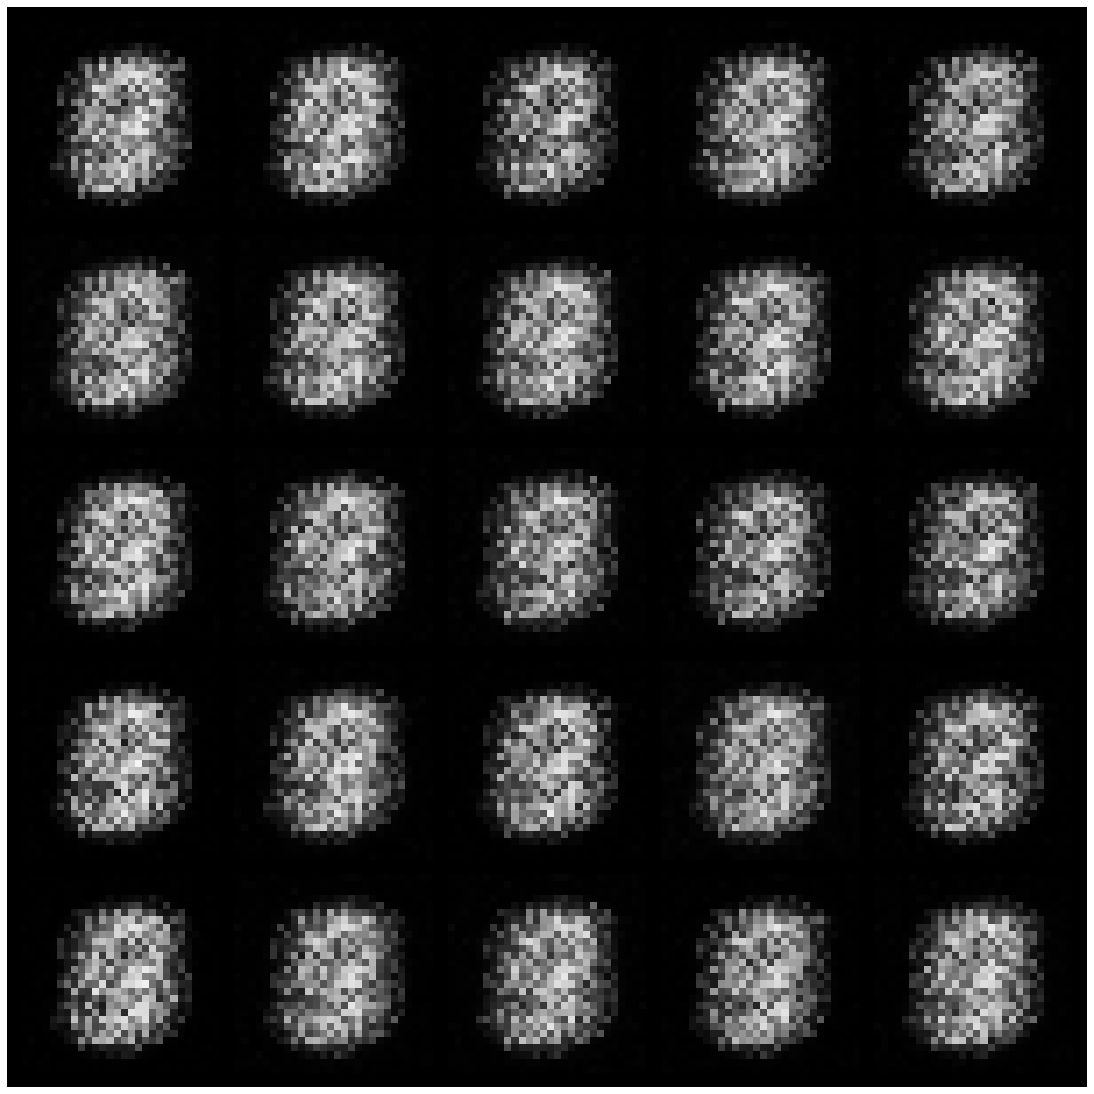

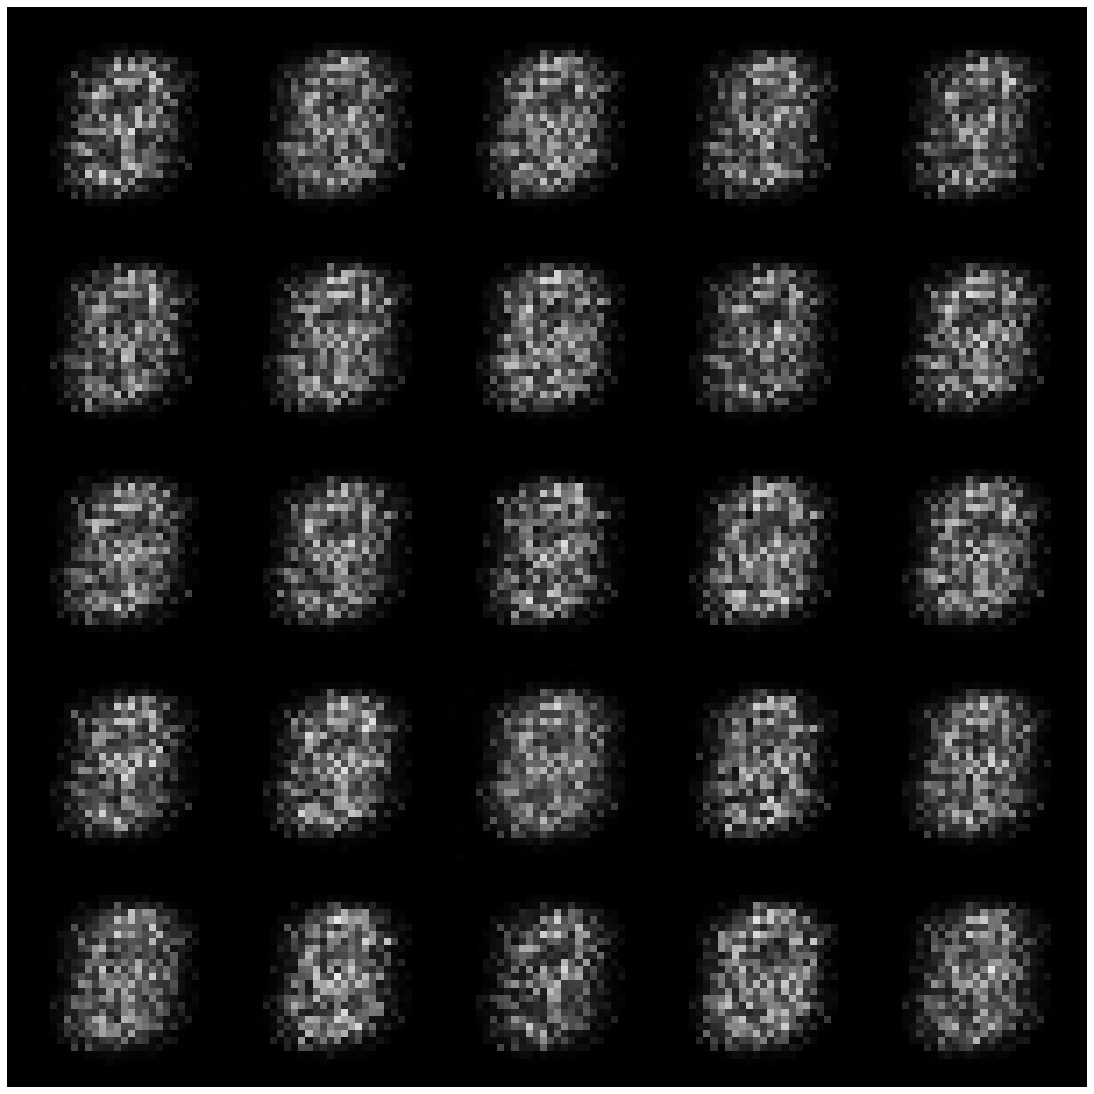

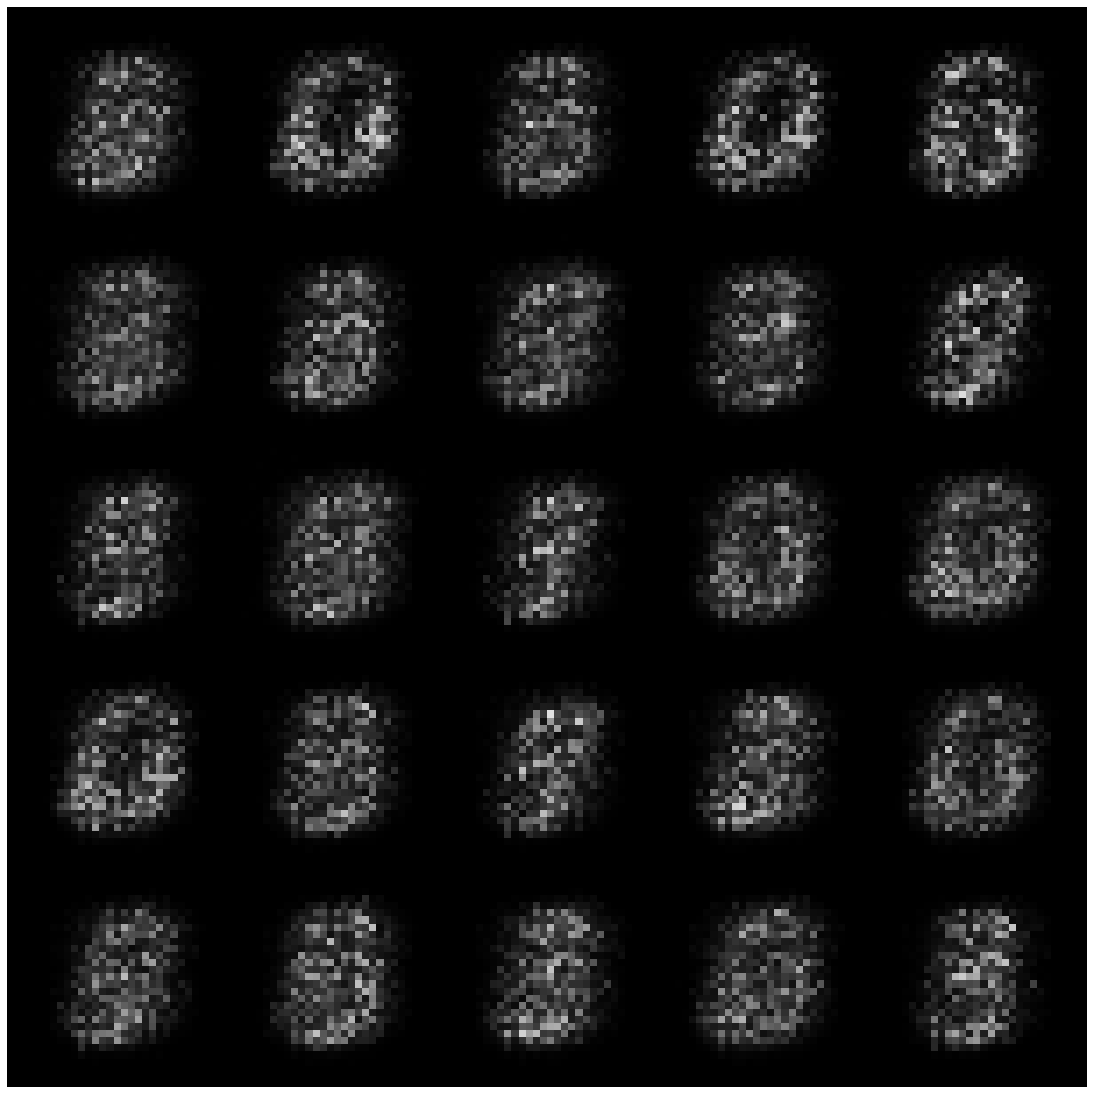

In [9]:
trainer.fit(gan, data_module)

In [10]:
experiment.experiment.end()


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/ihssen/gans-specialization/2e418e90ac8a49b9bedb5a5fe04743ba
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     disc_loss [39] : (0.14273083209991455, 0.643004298210144)
COMET INFO:     gen_loss [39]  : (0.7842537760734558, 2.042771577835083)
COMET INFO:     loss [797]     : (0.13410654664039612, 2.067108392715454)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (70.90 KB)
COMET INFO:     images                   : 4
COMET INFO:     installed packages       : 1
COMET INFO:     model graph              : 1
COMET INFO:     notebook                 : 1
COMET INFO:     os packages             

Epoch 4:  25%|██▍       | 115/469 [00:23<01:13,  4.83it/s, loss=0.954, v_num=43ba, gen_loss=1.670, disc_loss=0.208]